In [1]:
# Aqui neste c√≥digo ##

## 1. Cria√ß√£o de tabela √∫nica 
## 2. Retirar duplicatas
## 3. An√°lise das string nulas e valores nulos
## 4. An√°lise explorat√≥ria
## 5. Time Series - ARIMA Modelo Original
## 6. Time Series - ARIMA Modelo com transforma√ß√£o logar√≠tmica
## 7. Time Series - SARIMA Modelo Original
## 8. Time Series - SARIMA Modelo com transforma√ß√£o logar√≠tmica
## 9. Time Series - SARIMA Modelo Original para notas acima de 3

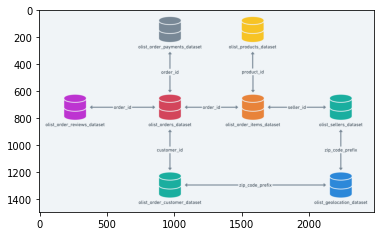

<Figure size 720x864 with 0 Axes>

In [2]:
## Plot do schema

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread('data_schema.png')
imgplot = plt.imshow(img)
plt.figure(figsize=(10, 12))
plt.show()

In [3]:
## Plot do schema

from PIL import Image                                                                                
img = Image.open('data_schema.png')
img.show() 

In [4]:
## Carregando as bases

olist_customers_dataset = pd.read_csv("olist_customers_dataset.csv") ## Base em que temos a informa√ß√£o de recompra;
olist_geolocation_dataset = pd.read_csv("olist_geolocation_dataset.csv") ## Base com informa√ß√£o de latitude e longitude. Por hora, n√£o ser√° necess√°ria;
olist_order_items_dataset = pd.read_csv("olist_order_items_dataset.csv") ## Base em que temos a informa√ß√£o de pre√ßo em que ser√° utilizada para o forecasting;
olist_order_payments_dataset = pd.read_csv("olist_order_payments_dataset.csv")  ## Base com informa√ß√£o de m√©todo de pagamento. Por hora, n√£o ser√° necess√°ria;
olist_order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv") ## Base em que temos o score de cada review;
olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv") ## Base em que temos a chave order_id;
olist_products_dataset = pd.read_csv("olist_products_dataset.csv") ## Base em que temos especifica√ß√µes do produto (ex: tamanho). Por hora, n√£o ser√° necess√°ria;
olist_sellers_dataset = pd.read_csv("olist_sellers_dataset.csv") ## Base em que temos especifica√ß√µes da localiza√ß√£o do seller. Por hora, n√£o ser√° necess√°ria;
product_category_name_translation = pd.read_csv("product_category_name_translation.csv") ## Base que traduz a categoria do produto para ingl√™s. Por hora, n√£o ser√° necess√°ria;


## Na an√°lise, s√≥ ser√£o utilizadas 4 bases de dados: olist_customers_dataset, olist_order_items_dataset, olist_orders_dataset e olist_order_reviews_dataset.

In [5]:
## Cria√ß√£o de tabela √∫nica

df = {}

df = pd.merge(olist_orders_dataset, olist_customers_dataset, on='customer_id', how='left')
df = pd.merge(df, olist_order_reviews_dataset, on='order_id', how='left')
df = pd.merge(df, olist_order_items_dataset, on='order_id', how='left')


In [6]:
## Conferindo informa√ß√µes da tabela √∫nica

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114092 entries, 0 to 114091
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114092 non-null  object 
 1   customer_id                    114092 non-null  object 
 2   order_status                   114092 non-null  object 
 3   order_purchase_timestamp       114092 non-null  object 
 4   order_approved_at              113930 non-null  object 
 5   order_delivered_carrier_date   112112 non-null  object 
 6   order_delivered_customer_date  110839 non-null  object 
 7   order_estimated_delivery_date  114092 non-null  object 
 8   customer_unique_id             114092 non-null  object 
 9   customer_zip_code_prefix       114092 non-null  int64  
 10  customer_city                  114092 non-null  object 
 11  customer_state                 114092 non-null  object 
 12  review_id                     

In [7]:
## An√°lise dos dados duplicados

df[df.duplicated()>0]

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, review_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []

[0 rows x 24 columns]

In [8]:
## Analisando NaN values

pd.set_option('display.max_rows', None)
missing_values = pd.concat([df.isna().sum().sort_values(ascending = False)], axis=1, keys=['Total'])
missing_values

Total
review_comment_title           100569
review_comment_message          65926
order_delivered_customer_date    3253
order_delivered_carrier_date     1980
review_id                         961
review_score                      961
review_answer_timestamp           961
review_creation_date              961
price                             778
shipping_limit_date               778
seller_id                         778
product_id                        778
order_item_id                     778
freight_value                     778
order_approved_at                 162
customer_id                         0
customer_state                      0
customer_city                       0
customer_zip_code_prefix            0
customer_unique_id                  0
order_estimated_delivery_date       0
order_purchase_timestamp            0
order_status                        0
order_id                            0

In [9]:
## Temos 8 erros em que objetos entregues n√£o tem data

df[df['order_delivered_customer_date'].isna()].order_status.value_counts()


shipped        1197
canceled        704
unavailable     612
invoiced        366
processing      358
delivered         8
created           5
approved          3
Name: order_status, dtype: int64

In [10]:
## Temos 2 erros em que objetos postados deveriam estar com data de postagem

df[df['order_delivered_carrier_date'].isna()].order_status.value_counts()

canceled       634
unavailable    612
invoiced       366
processing     358
created          5
approved         3
delivered        2
Name: order_status, dtype: int64

In [11]:
## An√°lise de 778 linhas com product_id, Seller_id e price nulos

df[df['seller_id'].isna()].order_status.value_counts()


unavailable    605
canceled       165
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

In [12]:
## Pedidos com seller_id zerado s√£o produtos que geralmente foram comprados e n√£o t√™m em estoque. Alguns foram cancelados e a empresa registra como seller_id nulo, product_id nulo, price nulo, como se a compra nunca tivesse sido realizada
## Percebi lendo alguns coment√°rios que, para produtos sem estoque (marcados como unavailable) o cliente paga, n√£o recebe e nem sequer √© notificado 

df[df['seller_id'].isna()]


## Revis√£o te√≥rica - √© preciso analisar o impacto da rela√ß√£o oferta-demanda para os modelos de previs√£o de vendas

order_id                       customer_id  \
306     8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
673     c272bcd21c287498b4883c7512019702  9582c5bbecc65eb568e2c1d839b5cba1   
798     37553832a3a89c9b2db59701c357ca67  7607cd563696c27ede287e515812d528   
857     d57e15fb07fd180f06ab3926b39edcd2  470b93b3f1cde85550fc74cd3a476c78   
1304    00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
1337    2f634e2cebf8c0283e7ef0989f77d217  7353b0fb8e8d9675e3a704c60ca44ebe   
1814    ee0db22a8e742b752914016708470ec8  aae50600d30bf2efe013ca4c1754ded7   
2054    ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
2088    6ad57aecbae806a7e9cc2cdb6b380711  d31dbd02ac052d662285f678f8994326   
2135    df8282afe61008dc26c6c31011474d02  aa797b187b5466bc6925aaaa4bb3bed1   
2324    8d4c637f1accf7a88a4555f02741e606  b1dd715db389a2077f43174e7a675d07   
2457    9f3458f0433d4cfa472f4682654b8d49  99ebfafde8b9e58fd12db9d5cc83132f   
2473    7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   
2624    f0df036e9be21fc238f131bbfcdde769  1fa16395beca89233661543954ca6cf1   
2644    86f0bcd9b426a2c1022ae317c7f27be6  dd24965dd5aa551df36ce4baf180445b   
3041    98fe01bc254b759c1f2c11d77c2891d5  30f3b26a06e5a67682305298f83e6be3   
3070    f56dc9034c3962e36d49fb73baa12800  5c4795c07c0bd317adaf7406327bbfa9   
3358    0130f0f71fb0e831d18e6a3b33a3a50c  e56f6dff7b8ac9813ddeb2312f0d834f   
3454    ddaec6fff982b13e7e048b627a11d6da  68f4ad79cc0c2ad06e19088f5c00e9fa   
3488    84b8ba39037606b7b30a39d02e9e4154  7c2bf05f6902368e5d21040b68c2bbdb   
3498    5290c34bd38a8a095b885f13958db1e1  92af427e290117f39d9ff908566072e0   
3907    2f30c0b1905c65a8ff6c6358bc909625  e963d0e4f815dcd28b135d7d340ec51a   
4010    534a0fbe91a806a1dc6bf09b497e3d6f  d17ae8582d302dbd41b87e5028e8c0e2   
4146    5965bbd72c3ca0d9634419437ca53897  3dd8536c33d454b9a9d05ba357eeaaa9   
4159    03310aa823a66056268a3bab36e827fb  25dbbf0c477fd4ae0880aaffbb12e8b3   
4277    b07abc8b9acaf00e79b4657419f469f3  15308b044c9608fc82e57f2e5d6878f6   
4634    1ff6183537eb3a189de77b309ed28ad1  52ac1d5c2063338b5a45f69a14528c9b   
4813    2411e5019928e883d049f7242362c23b  92ac70cce9e5ac1bb34996610d9564a4   
4911    f8303e6eff198d1749d04649a1eb2bb6  4569e86ad4faba51cadc49ea1657ac3a   
4955    4c8b9947280829d0a8b7e81cc249b875  403c35c4d8813bf67b3d396b91ca1619   
5141    c2ccb6c2af36d8492e83ecf528f2755c  07a4bb60f62e5ce83b63a08f0cd050bc   
5215    b7be5e58fd37e6165dbb39e8362c8446  021ed85d23b734289c4dd0c827a3559e   
5590    b13ea375fe9c728832688264638f84cf  0dc5884bc5ffba283678229f27e07ff9   
5621    bcd65d5c97ac448bb3efc90b759909fd  b6ba3ad41b033a7f107aabad3dabff93   
5699    46f36d95da75ced0462d57df904d36d0  06c629d842cb8236fceea0a9e90ccd1a   
5772    4748c7d66bbedbf52de84b3bc4cbc482  59e42a0f4ed79508f022aca1f2f87e25   
5837    ea844c92cf978ea23321fa7fe5871761  6ddc45ad08e6a2c885ca2255fc52d6df   
6016    79563470c891926bb9507d1ad1ff661d  27fc1e85ea154f4ad91805cf8ce1fb55   
6058    9be3c9722389548409bf4cb39d07e347  259a69df1ae08bfa31e849741233d520   
6159    85e05c3c9aa9834518f35d4f286014be  1d07a80a15700b40cb15ff5870ee8b48   
6253    38a86eb53c2309d6234fc9bad96331ac  82d98198f7fb1687858e03a5322e1621   
6398    c5a468ae781ffb0ec6d36ae89fe512b0  ed7ef682569428c1afaf73b39a2f602b   
6510    05e8a1fd3d354369a3de6e7230a3651f  6fc1bac3e55ec9c69f1f65253026ffdb   
6517    2dd5bcfb8c66b22a80ffe45078eb2a99  eb55392e91ca4fb066e8c3d099400dd1   
6525    d1b4fc9a8c1207433519a8ec52e2d03f  f9a6bf8bc89af704ecd48975eff11800   
7156    9d4e334ddde795cd4fbee24dc4b68cfe  63531fc8d878fe9a0ac4fd07a4d8a7b1   
7182    f63be24880200ae32aa24f5b458a3dc3  a6954f48f5d8a0dcbad1a0921109cb56   
7233    2bb02fdf5637a68cd5d13c78c37c3376  8c468917b274857623298a1627369866   
7530    b842e9225252d13f6af62ff4508d7c43  d9a4b5aa53433b592bdea6b33f44a8e8   
7534    f2a335c81aebf64a9a4309436e7af4a8  cca8b12b9e669afd8a28ff57fd5c5e75   
7692    50428fc6ef58fd5cebf433ef7f06be0d  7dab920e35ce

In [13]:
## Sobre os canceled com seller_id nulo: produto errado, com defeito ou n√£o chegou

df[(df['seller_id'].isna()) & (df['order_status']=='canceled')]

order_id                       customer_id  \
1304    00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
2054    ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
2135    df8282afe61008dc26c6c31011474d02  aa797b187b5466bc6925aaaa4bb3bed1   
2324    8d4c637f1accf7a88a4555f02741e606  b1dd715db389a2077f43174e7a675d07   
2473    7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   
3454    ddaec6fff982b13e7e048b627a11d6da  68f4ad79cc0c2ad06e19088f5c00e9fa   
3498    5290c34bd38a8a095b885f13958db1e1  92af427e290117f39d9ff908566072e0   
4159    03310aa823a66056268a3bab36e827fb  25dbbf0c477fd4ae0880aaffbb12e8b3   
4955    4c8b9947280829d0a8b7e81cc249b875  403c35c4d8813bf67b3d396b91ca1619   
5590    b13ea375fe9c728832688264638f84cf  0dc5884bc5ffba283678229f27e07ff9   
5837    ea844c92cf978ea23321fa7fe5871761  6ddc45ad08e6a2c885ca2255fc52d6df   
6159    85e05c3c9aa9834518f35d4f286014be  1d07a80a15700b40cb15ff5870ee8b48   
6253    38a86eb53c2309d6234fc9bad96331ac  82d98198f7fb1687858e03a5322e1621   
6398    c5a468ae781ffb0ec6d36ae89fe512b0  ed7ef682569428c1afaf73b39a2f602b   
6525    d1b4fc9a8c1207433519a8ec52e2d03f  f9a6bf8bc89af704ecd48975eff11800   
7233    2bb02fdf5637a68cd5d13c78c37c3376  8c468917b274857623298a1627369866   
8256    5226f1a731e8a1215da5e1bea64e2130  3489fb03bfa99335c385df8b863a701b   
8494    9380c59012c11f49c549ef8dffef1367  07838708499d3eb9da748cb10b8ddf0a   
9444    672ab3776d5b25e586521469609ae774  8c8b3a28c07f67148f86f297604b9875   
11369   87ae60ef8b08ae0e5f903cacb53a6904  fea4d57ed3a45455f89c25ef3dae8ee8   
11473   809a282bbd5dbcabb6f2f724fca862ec  622e13439d6b5a0b486c435618b2679e   
11595   651a89e11653d8df43a624a903fe0f5e  e536e3de6a1ac1c527acb004f4120d81   
11895   947e9c6bfd83a06953c420ef92d3da6e  2737211835d5ea370af15ee145f7840c   
12612   0e6dbbc7484dc1ee0392c9ca801035c2  90f65e1539426f18ab1941841d728c72   
14934   186d3cd768be1890d832106f914ba37c  07b0857255ede98368d11c60ae263bfa   
16492   2e9d8db9e132a9b5e1236618b7e8ef4a  51c6f517f4492a9c2ab4153e998b018e   
16642   5d9e1e0e7084f2f9e90a7069e64cba61  5a0e3721a8ca7e273f07af1ead76605e   
18146   252788350f9dad30b31847845fe119fe  43c2e0c2bffdba58e569a9cf02d9b508   
18721   bd35b677fd239386e9861d11ae98ab56  ad2eb5d02c0808bcd8743117f6383cf6   
18822   b642a3e08bfd10119c9b7e948c936e93  f623e071624706724ec88fbb991b6833   
18924   00d0ffd14774da775ac832ba8520510f  a2f3de2a0a84803cef018776a2e76c9b   
19422   93274b931b5771bd02154c9b716168ba  0d6ea3b6f1bf6ef08e6b60ce23db077b   
19544   63802c52ced9ff923c962ecbf4b3a2a2  8424f98d9254ad85c24141f3cd2fe8c5   
20594   0a472c47d928bf4cd8b6a7a30345eeb7  8762d94c493b70216cd453ea2320234e   
21359   ccd4eb95e68cb64e666ddcb84f8dfb1e  daac514ffdd2cc0cda0e9686c63a9cad   
23810   4d59cc2a2e7bb6c0a851725f5888a9b5  ead83a4f8f7be8c3034b2e98754a6147   
25466   81b7c7bbc8ec003eeb67d87441a6a148  75c6e03e7206bd1dd59f427c9f75142a   
26960   15ec3d48383c58c0dc96cd66f8884630  fc768a2275c44d9383cc6926adac469d   
27630   33fe1cb532ac16a48902980e00c26da6  e0669fc658288e9aea6d958ea90fb9b7   
27963   0d3adebce4bebc1f80a7f36e9833f497  a7c87c25dbdded68c26c640582cb5ddb   
28194   4a44e928d587e7cd7068ea354471c477  f04cee5f84e73924695f31301c815ab8   
28735   6c16d886be4fe03174a289a4ca70a775  780b36c3e066c0251df695c5ce83994e   
29240   44b4829b58167b697a69c8aa8eb64733  9a4a3ebb868261c944c5ba16fdaff61b   
29403   1857e77a4bad8abb2db929f107430663  616833eaef04d25b67207119cd6936dc   
29747   bb8edfe0742a6a0279b7dff848289568  c2a1740e781cc978dbab71735cf3ce84   
30511   02e723e8edb4a123d414f56cc9c4665e  6e9f7d9e943f9c0bdea278d9d7a1c9b9   
30512   02e723e8edb4a123d414f56cc9c4665e  6e9f7d9e943f9c0bdea278d9d7a1c9b9   
32975   670e3b20191d3198a76069c8f9b12355  f76bd438480c183ffb510bad040f3bd9   
33054   ba2821b49c92e278db491d3e19fa0556  159ca8ee3ba03b17c749a3bc8e099e87   
33064   9abe82df39e950e1e0c1a5969e22571e  0d0616e01497d605e2bc400cba06de99   
33385   dafb12075abc3168e9addb5ccf7a02c5  a623062e2e69

In [14]:
## An√°lise 1: Existe correla√ß√£o entre pedidos atrasados e nota atribu√≠da?
## a. Analisar dentre os pedidos atrasados, quantos receberam nota menor ou igual a 3
## b. Analisar dentre os pedidos n√£o atrasados, quantos receberam nota maior do que 3
## c. Analisar se existe correla√ß√£o linear entre quantidade de dias de demora na entrega e nota

In [15]:
## Cria√ß√£o de um subset para an√°lise

df2={}
df2 = pd.DataFrame().assign(order_id=df['order_id'], order_delivered_customer_date=df['order_delivered_customer_date'], order_estimated_delivery_date = df['order_estimated_delivery_date'], review_score =df['review_score'])
df2.head()

## Vamos excluir os NaN values

df2.dropna(inplace=True)

## Agora vamos considerar apenas a primeira linha que tiver order_id

df2.drop_duplicates(subset=['order_id'], inplace=True)

In [16]:
import datetime
import numpy as np

## Transformando os dados de datetime para timestamp

df2['order_delivered_customer_date_transformed'] = pd.to_datetime(df2['order_delivered_customer_date'])
df2['order_delivered_customer_date_transformed'] = df2.order_delivered_customer_date_transformed.values.astype(np.int64) // 10 ** 9
df2['order_delivered_customer_date_transformed'].head()

df2['order_estimated_delivery_date_transformed'] = pd.to_datetime(df2['order_estimated_delivery_date'])
df2['order_estimated_delivery_date_transformed'] = df2.order_estimated_delivery_date_transformed.values.astype(np.int64) // 10 ** 9
df2['order_estimated_delivery_date_transformed'].head()

## Calculando a diferen√ßa entre o tempo estimado e o tempo de chegada do pedido. Nos casos negativos, o pedido atrasou.


df2['estimated_minus_delivered'] = df2['order_estimated_delivery_date_transformed']-df2['order_delivered_customer_date_transformed']


1.0    3539
5.0    1703
4.0     946
3.0     871
2.0     603
Name: review_score, dtype: int64

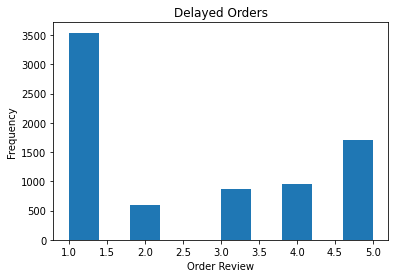

In [17]:
## 65% dos pedidos que atrasam recebem notas menores do que 3

df2_delayed = df2[df2['estimated_minus_delivered']<0]

import matplotlib.pyplot as plt

plt.title('Delayed Orders')
plt.xlabel('Order Review')
plt.ylabel('Frequency')
plt.hist(df2_delayed['review_score'])

df2_delayed['review_score'].value_counts()

5.0    55055
4.0    17947
3.0     7038
1.0     5808
2.0     2320
Name: review_score, dtype: int64

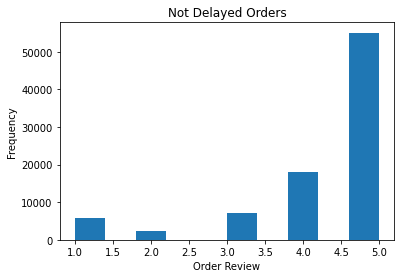

In [18]:
## 83% dos pedidos que n√£o atrasaram receberam nota boa (>=4)

df2_not_delayed = df2[df2['estimated_minus_delivered']>=0]

import matplotlib.pyplot as plt

plt.title('Not Delayed Orders')
plt.xlabel('Order Review')
plt.ylabel('Frequency')
plt.hist(df2_not_delayed['review_score'])

df2_not_delayed['review_score'].value_counts()

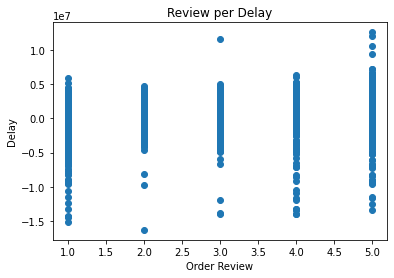

In [19]:
## N√£o existe rela√ß√£o linear entre quantidade de dias de demora na entrega e nota

plt.scatter(df2['review_score'], df2['estimated_minus_delivered'])
plt.title('Review per Delay')
plt.xlabel('Order Review')
plt.ylabel('Delay')
plt.show()

In [20]:
## An√°lise 2: Os clientes que d√£o melhor nota s√£o os clientes que voltam √† comprar na Olist?
## a. Analisar dos que recompraram, quantos deram notas boas
## b. Analisar dos que n√£o recompraram, quantos deram notas ruins

In [21]:
## Cria√ß√£o de um subset para an√°lise

df3 = {}
df3 = pd.DataFrame().assign(order_id=df['order_id'], customer_unique_id=df['customer_unique_id'], review_score =df['review_score'])
df3.head()


## Vamos excluir os NaN values

df3.dropna(inplace=True)

## Agora vamos considerar apenas a primeira linha que tiver order_id

df3.drop_duplicates(subset=['order_id'], inplace=True)

## Criando a coluna de recompra. Caso True, o cliente recomprou na loja Olist

df3['repurchase'] = df3['customer_unique_id'].duplicated()

In [22]:
## Dos que recompraram, temos notas boas (>=4) em 79% dos casos

df3_repurchase_view = df3[df3['repurchase']>0]

df3_repurchase_view['review_score'].value_counts()

5.0    2026
4.0     566
1.0     363
3.0     251
2.0      87
Name: review_score, dtype: int64

In [23]:
## Dos que n√£o recompraram, temos notas boas (>4) em 77% dos casos

df3_not_repurchase_view = df3[df3['repurchase']<=0]

df3_not_repurchase_view['review_score'].value_counts()

#A hip√≥tese √© de que o volume de recompra √© pequeno (Cerca de 3,3% dentre todo o universo) e, portanto, a an√°lise pode ser inconclusiva devido ao espa√ßo amostral.

## Se olharmos para o setor da olist, temos uma concorr√™ncia acirrada. A Olist est√° interessada em fidelizar os clientes ou est√° apenas competindo no pre√ßo? Entender o objeto (Ver teoria de concorr√™ncia perfeita)

5.0    54993
4.0    18478
1.0    10990
3.0     7873
2.0     3046
Name: review_score, dtype: int64

In [24]:
## An√°lise 3: Nuvem de palavras para as notas consideradas ruins 

In [25]:
df5 = {}
df5 = pd.DataFrame().assign(order_id=df['order_id'], review_score =df['review_score'], review_comment_message=df['review_comment_message'])
df5.head()


## Vamos excluir os NaN values

df5.dropna(inplace=True)

## Agora vamos considerar apenas a primeira linha que tiver order_id

df5.drop_duplicates(subset=['order_id'], inplace=True)


## Agora vamos filtrar apenas os coment√°rios de nota baixa

df5_neg_review = df5[df5.review_score<=3]['review_comment_message']
df5_pos_review = df5[df5.review_score>3]['review_comment_message']

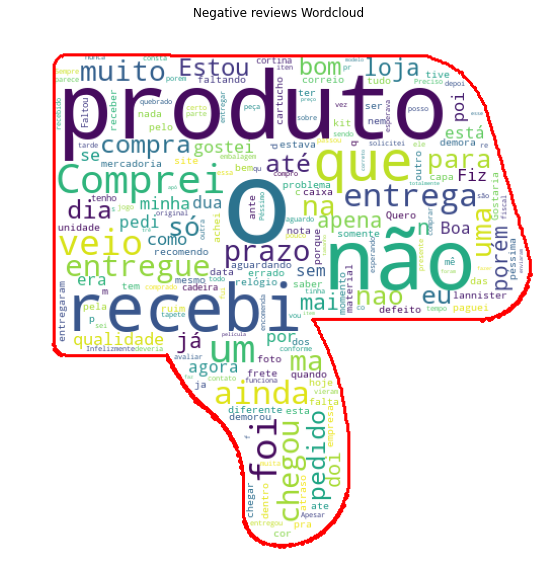

In [26]:
import numpy as np
from PIL import Image
import urllib
from io import BytesIO
import requests
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS


# Palavras a serem desconsideradas da an√°lise
stopwords = set(STOPWORDS)
stopwords.update(["/n" ,"da", "meu", "em", "voc√™", "de", "ao", "os", "e", 'ou', '√©'])
 

def open_img(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img_np = np.array(img)
    return img_np

mask = open_img('https://cdn-images-1.medium.com/max/537/1*CK7ulJRe6nqeorManOJUzg.png')


## Gerando a nuvem de palavras
wordcloudInst = WordCloud(stopwords=stopwords,
                      background_color="white",
                      random_state=1,
                    #   colormap='Reds', 
                      mask=mask,
                      contour_width=2, 
                      contour_color='Red',
                      collocations=False, 
                      repeat = False,                   
                      width=700, height=700).generate(df5_neg_review.to_string(index=False))
 
## Configurando visualiza√ß√£o da imagem
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloudInst, interpolation='bilinear')
ax.set_axis_off()
 
## Plotando a imagem
plt.title('Negative reviews Wordcloud')
plt.imshow(wordcloudInst)

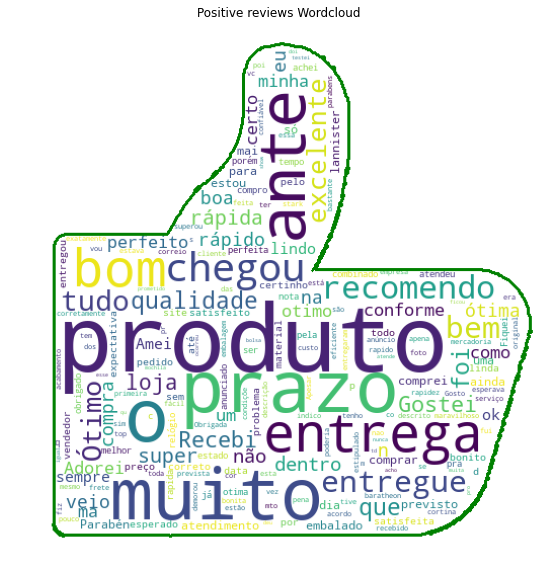

In [27]:
mask = open_img("https://cdn-images-1.medium.com/max/537/1*q4vrNnlsX_d4glglS35AGw.png")


## Gerando a nuvem de palavras
wordcloudInst = WordCloud(stopwords=stopwords,
                      background_color="white",
                      random_state=1,
                    #   colormap='Greens', 
                      mask=mask,
                      contour_width=2, 
                      contour_color='Green',  
                      collocations=False, 
                      repeat = False,    
                      width=700, height=700).generate(df5_pos_review.to_string(index=False))
 
## Configurando visualiza√ß√£o da imagem
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloudInst, interpolation='bilinear')
ax.set_axis_off()
 
## Plotando a imagem
plt.title('Positive reviews Wordcloud')
plt.imshow(wordcloudInst)

In [28]:
## An√°lise 4: Forecasting

In [29]:
## Criando o dataset

df4 = {}
df4 = pd.DataFrame().assign(order_purchase_timestamp=df['order_purchase_timestamp'], price=df['price'], review_score=df['review_score'])
df4.head()

## Transformando de datetime para date

df4['order_purchase_timestamp'] = pd.to_datetime(df4['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
df4['order_purchase_timestamp'].dtype

df4['order_purchase_timestamp'] = df4['order_purchase_timestamp'].dt.date
df4['order_purchase_timestamp']

## Agregando o pre√ßo por data

df4 = df4.groupby("order_purchase_timestamp").price.sum()

## Retransformando em dataframe

df4 = df4.to_frame()
df4

price
order_purchase_timestamp           
2016-09-04                    72.89
2016-09-05                    59.50
2016-09-13                     0.00
2016-09-15                   134.97
2016-10-02                   100.00
2016-10-03                   463.48
2016-10-04                  9940.96
2016-10-05                  8343.25
2016-10-06                  7960.51
2016-10-07                  7228.05
2016-10-08                  8441.85
2016-10-09                  3336.99
2016-10-10                  3819.26
2016-10-22                     0.00
2016-12-23                    10.90
2017-01-05                   396.90
2017-01-06                   916.38
2017-01-07                  1351.90
2017-01-08                   709.58
2017-01-09                   673.79
2017-01-10                  1434.87
2017-01-11                  2776.16
2017-01-12                  2234.58
2017-01-13                  2505.58
2017-01-14                  1112.69
2017-01-15                  2349.47
2017-01-16                  3307.92
2017-01-17                  3371.43
2017-01-18                  4032.36
2017-01-19                  3553.95
2017-01-20                  4035.83
2017-01-21                  2525.50
2017-01-22                  3619.27
2017-01-23                  6581.47
2017-01-24                  5955.17
2017-01-25                  8977.23
2017-01-26                 13537.00
2017-01-27                 11432.95
2017-01-28                  5211.01
2017-01-29                  6457.66
2017-01-30                 10801.13
2017-01-31                 11226.12
2017-02-01                  8219.75
2017-02-02                  8917.64
2017-02-03                 10183.74
2017-02-04                 13968.16
2017-02-05                  8503.79
2017-02-06                  9539.44
2017-02-07                 14263.08
2017-02-08                 11958.27
2017-02-09                  9410.29
2017-02-10                 14222.64
2017-02-11                  4307.56
2017-02-12                 15126.15
2017-02-13                 10785.15
2017-02-14                 13133.91
2017-02-15                  6770.15
2017-02-16                  6348.04
2017-02-17                  6801.26
2017-02-18                  7493.13
2017-02-19                  3797.90
2017-02-20                  7878.30
2017-02-21                  8285.64
2017-02-22                  8317.85
2017-02-23                  6940.82
2017-02-24                  6682.21
2017-02-25                  4196.59
2017-02-26                  5446.68
2017-02-27                  5844.12
2017-02-28                 11220.76
2017-03-01                 12680.31
2017-03-02                 11377.00
2017-03-03                 12398.64
2017-03-04                 12658.51
2017-03-05                  7174.42
2017-03-06                 10336.64
2017-03-07                 11902.51
2017-03-08                 14612.46
2017-03-09                 11705.54
2017-03-10                 12418.77
2017-03-11                 10852.97
2017-03-12                  6637.06
2017-03-13                 17236.85
2017-03-14                 14243.66
2017-03-15                 15129.23
2017-03-16                 14269.78
2017-03-17                 11970.40
2017-03-18                 16433.82
2017-03-19                  6649.34
2017-03-20                 17096.49
2017-03-21                 11448.93
2017-03-22                 14291.18
2017-03-23                 16375.55
2017-03-24                 10177.87
2017-03-25                  9996.04
2017-03-26                  6320.95
2017-03-27                 16356.97
2017-03-28                 12373.11
2017-03-29                  8660.54
2017-03-30                 10025.60
2017-03-31                 12199.56
2017-04-01                 17697.37
2017-04-02                  9129.88
2017-04-03                  9226.56
2017-04-04                 12301.65
2017-04-05                 19048.74
2017-04-06                 23213.89
2017-04-07                 13300.65
2017-04-08                  8785.09
2017-04-09                  8222.6

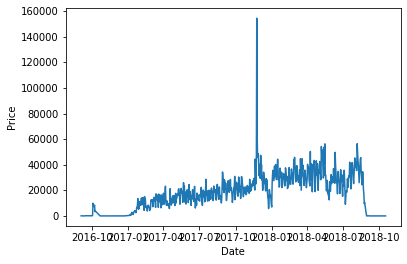

In [30]:
## Plot da rela√ß√£o entre data e pre√ßo. Poodemos observar um outlier

plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df4)

In [31]:
## Agora, vamos preencher as datas faltantes com vendas nulas

df4 = df4.asfreq(freq='1D', fill_value = 0)
df4

## Dropando valores nulos do in√≠cio da s√©rie
df4 = df4.loc['2017-01-05':'2018-08-27']

C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

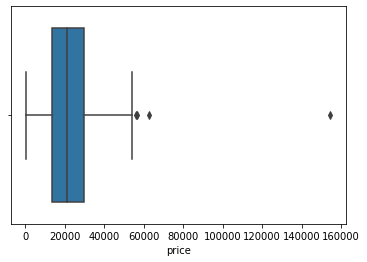

In [32]:
## Plotando o gr√°fico para identificar se ainda h√° presen√ßa de outliers

sns.boxplot(df4['price'])

C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

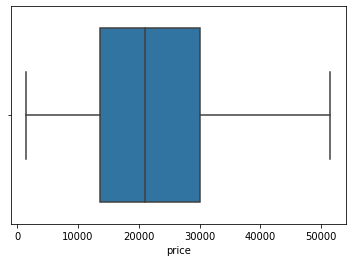

In [33]:
## Removendo outliers baseado no percentil de 0.99

upper_limit = df4['price'].quantile(0.99)
lower_limit = df4['price'].quantile(0.01)

df4['price'] = np.where((df4['price'] < lower_limit),
        lower_limit,
        np.where((df4['price'] > upper_limit),
        upper_limit,
        df4['price']))

## Plotando novamente o boxplot sem os outliers
sns.boxplot(df4['price'])

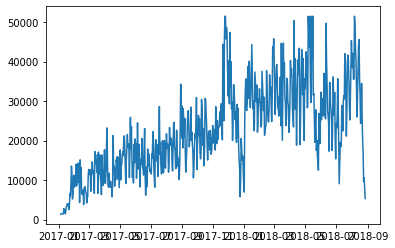

In [34]:
## Interpolando os valores nulos 

df4 = df4.asfreq(freq='1D', fill_value = 0)
df4.interpolate(inplace=True)

## Plotando a s√©rie tratada
plt.plot(df4)

In [35]:
## Dividindo dataset entre treino e teste (80/20)


import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

x = df4
df4_train, df4_test = train_test_split(x, train_size=480)

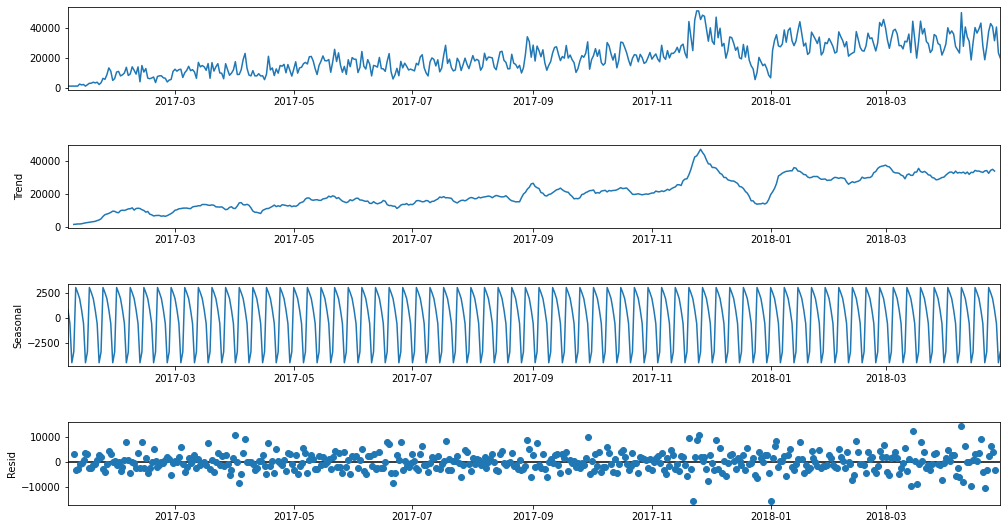

In [36]:
## Explorando tend√™ncia, sazonalidade e res√≠duos do dataset de treino

from statsmodels.tsa.seasonal import seasonal_decompose

season = seasonal_decompose(df4_train)
fig = season.plot();
fig.set_size_inches(16,8)

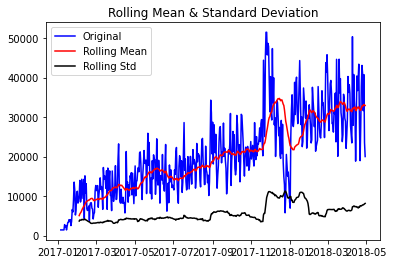

In [37]:
## Defasando para criar a m√©dia m√≥vel e o desvio padr√£o em 30 dias

rolmean = df4_train.rolling(window= 30).mean()
rolstd = df4_train.rolling(window = 30).std()

## Plotando a m√©dia m√≥vel

orig = plt.plot(df4_train, color='blue', label = 'Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [43]:
## Teste de Dickey-Fuller
def dickey_fuller(dickey_fuller_col):
    
    dickey_fuller_col.replace([np.inf, -np.inf], np.nan)
    dickey_fuller_col.dropna(inplace=True)
    
    from statsmodels.tsa.stattools import adfuller

    print ('Result of Fuller test:')

    dftest = adfuller(dickey_fuller_col, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', '#Number of observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print("Dickey-Fuller test:\n")
    print(dfoutput)

    
## Dickey-fuller para o dataset original sem diferencia√ß√£o

dickey_fuller(df4_train['price'])

Result of Fuller test:
Dickey-Fuller test:

Test Statistic                   -2.308543
p-value                           0.169227
#Lags Used                       15.000000
#Number of observations Used    464.000000
Critical Value (1%)              -3.444522
Critical Value (5%)              -2.867789
Critical Value (10%)             -2.570099
dtype: float64


In [48]:
## Teste KPSS
def kpss(kpss_column):
    
    kpss_column.replace([np.inf, -np.inf], np.nan)
    kpss_column.dropna(inplace=True)
    
    from statsmodels.tsa.stattools import kpss

    kpss_input = kpss(kpss_column)
    kpss_test = pd.Series(kpss_input[0:3], index=['Teste Statistico KPSS','Valor-P','Lags Usados'])
    kpss_test = round(kpss_test,4)
    
    for key, value in kpss_input[3].items():
        kpss_test["Valores Cr√≠ticos (%s)"%key] = value
    print("KPSS test:\n")
    print(kpss_test)

kpss(df4_train['price'])

KPSS test:

Teste Statistico KPSS       3.1895
Valor-P                     0.0100
Lags Usados                12.0000
Valores Cr√≠ticos (10%)      0.3470
Valores Cr√≠ticos (5%)       0.4630
Valores Cr√≠ticos (2.5%)     0.5740
Valores Cr√≠ticos (1%)       0.7390
dtype: float64


C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


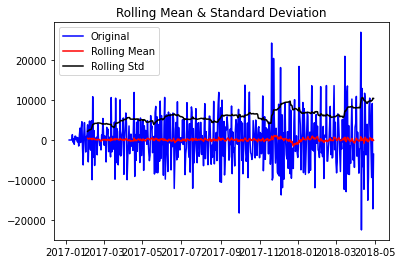

In [45]:
## Diferenciando o dataset original

df4_diff = df4_train.diff()

df4_rolmeandDiff = df4_diff.rolling(window= 30).mean()
df4_rolstdDiff = df4_diff.rolling(window = 30).std()


## Plotando o dataset diferenciado

orig = plt.plot(df4_diff, color='blue', label = 'Original')
mean = plt.plot(df4_rolmeandDiff, color='red', label = 'Rolling Mean')
std = plt.plot(df4_rolstdDiff, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [46]:
## Dickey-fuller para o dataset com diferencia√ßao

dickey_fuller(df4_diff['price'])

Result of Fuller test:
Dickey-Fuller test:

Test Statistic                 -6.615837e+00
p-value                         6.210773e-09
#Lags Used                      1.500000e+01
#Number of observations Used    4.630000e+02
Critical Value (1%)            -3.444553e+00
Critical Value (5%)            -2.867803e+00
Critical Value (10%)           -2.570106e+00
dtype: float64


In [49]:
## KPSS para o dataset com diferencia√ß√£o

kpss(df4_diff['price'])


KPSS test:

Teste Statistico KPSS       0.1895
Valor-P                     0.1000
Lags Usados                78.0000
Valores Cr√≠ticos (10%)      0.3470
Valores Cr√≠ticos (5%)       0.4630
Valores Cr√≠ticos (2.5%)     0.5740
Valores Cr√≠ticos (1%)       0.7390
dtype: float64


C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [55]:
## Definindo fun√ß√µes ARIMA, RMSE e MAE

## ARIMA Modelo Original

def arima_model(arima_column, p, d, q):
    
    from statsmodels.tsa.arima.model import ARIMA
    arima = ARIMA(arima_column, freq='D', order = (p,d,q))
    result_AR = arima.fit()
    (result_AR.resid**2).mean()
    forecast = result_AR.forecast(steps=120)
    return result_AR, forecast
    

## Erro RMSE

def rmse(df_test, forecast):

    import math
    y_actual = df_test.squeeze()
    y_predicted = forecast.squeeze()

    MSE = 0

    for i in range(len(y_actual)):
        MSE += np.square(np.subtract(y_actual[i],y_predicted[i]))

    MSE = MSE/len(y_actual)
    RMSE = math.sqrt(MSE)
    print("Root Mean Square Error:\n")
    print(RMSE)
    
## Erro MAE

def mae(df_test, forecast):
    
    import math
    y_actual = df_test.squeeze()
    y_predicted = forecast.squeeze()

    MAE = 0

    for i in range(len(y_actual)):
        MAE += np.sqrt(np.power((np.subtract(y_actual[i],y_predicted[i])),2))

    MAE = MAE/len(y_actual)

    print("Mean Absolute Error:\n")
    print(MAE)

In [ ]:
############################################## ARIMA - Modelo Original #########################################################

C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


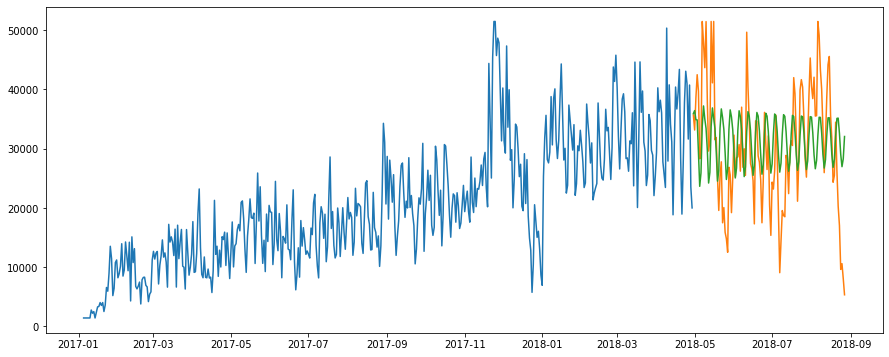

In [51]:
## ARIMA para o modelo original

df4_model, df4_forecast = arima_model(df4_train.price, 10,1,4)

plt.figure(figsize=(15, 6))
plt.plot(df4_train.price)
plt.plot(df4_test)
plt.plot(df4_forecast)

In [57]:
## Erro RMSE
rmse(df4_test, df4_forecast)
print("\n")

## Erro MAE
mae(df4_test, df4_forecast)

Root Mean Square Error:

9201.27719132206


Mean Absolute Error:

7356.390513497618


In [63]:
def summary_model(df_test, forecast, df_col, model_resid):

    from statsmodels.stats.stattools import durbin_watson
    from statsmodels.stats.diagnostic import acorr_ljungbox
    from scipy.stats import kstest
    from scipy.stats import jarque_bera
    from statsmodels.stats.diagnostic import het_arch
    from matplotlib.pyplot import scatter
    
    ## RMSE
    
    rmse(df_test, forecast)
    print("\n")
    
    ## MAE
    
    mae(df_test, forecast)
    print("\n")
    ## Dickey-Fuller
    
    dickey_fuller(df_col)
    print("\n")
    
    ## KPSS
    
    kpss(df_col)
    print("\n")
    
    ## Ljung-Box
    
    print("Ljung-Box test:\n")
    print(acorr_ljungbox(model_resid, lags=[30]))
    print("\n")
    
    ## Durbin-Watson
    
    print("Durbin-Watson test:\n")
    print(durbin_watson(model_resid))
    print("\n")
    
    ## KSTest
    
    print("KS test:\n")
    print(kstest(model_resid, 'norm'))
    print("\n")
    
    ## Jarque-Bera
    
    print("Jarque-bera test:\n")
    print(jarque_bera(model_resid))
    print("\n")
    
    ## ARCH-Test
    print("ARCH test:\n")
    print(het_arch(model_resid, nlags=30, store=True, ddof=0))
    print("\n")
    
summary_model(df4_test, df4_forecast, df4_diff['price'], df4_model.resid)

Root Mean Square Error:

9201.27719132206


Mean Absolute Error:

7356.390513497618


Result of Fuller test:
Dickey-Fuller test:

Test Statistic                 -6.615837e+00
p-value                         6.210773e-09
#Lags Used                      1.500000e+01
#Number of observations Used    4.630000e+02
Critical Value (1%)            -3.444553e+00
Critical Value (5%)            -2.867803e+00
Critical Value (10%)           -2.570106e+00
dtype: float64


KPSS test:

Teste Statistico KPSS       0.1895
Valor-P                     0.1000
Lags Usados                78.0000
Valores Cr√≠ticos (10%)      0.3470
Valores Cr√≠ticos (5%)       0.4630
Valores Cr√≠ticos (2.5%)     0.5740
Valores Cr√≠ticos (1%)       0.7390
dtype: float64


Ljung-Box test:

      lb_stat  lb_pvalue
30  34.153636   0.274732


Durbin-Watson test:

1.9385105313676767


KS test:

KstestResult(statistic=0.5125, pvalue=1.5683853096428398e-117)


Jarque-bera test:

Jarque_beraResult(statistic=41.3825950972485, pvalue=1.

C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


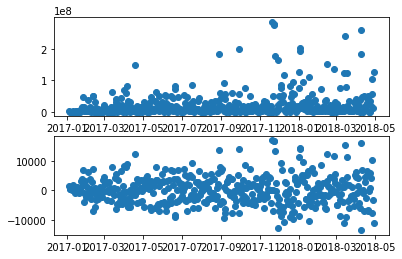

In [68]:
## Plot Erro quadr√°tico m√©dio

def plot_error(df_model, df_train_index):
    
    ## Plot erro quadr√°tico
    
    res = df_model.resid**2

    from matplotlib.pyplot import scatter
    plt.subplot(2,1,1)
    scatter(df_train_index, res)

    ## Plot Erro

    from matplotlib.pyplot import scatter
    plt.subplot(2,1,2)
    scatter(df_train_index, df_model.resid)
    
plot_error(df4_model, df4_train.index)

In [ ]:
################################################### ARIMA - Transforma√ß√£o Logar√≠tmica ##########################################

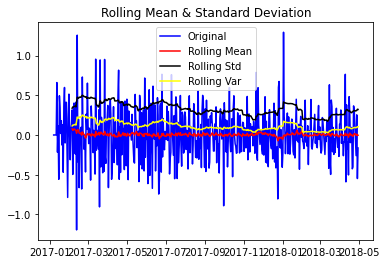

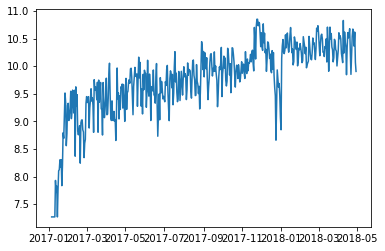

In [74]:
## ARIMA com transforma√ß√£o logar√≠tmica

##Transformando o dataset

df4_log_train = np.log(df4_train)
df4_log_test = np.log(df4_test)

df4_log_train_diff = df4_log_train.diff()

rolmeandDiffLog = df4_log_train_diff.rolling(window= 30).mean()
rolstdDiffLog = df4_log_train_diff.rolling(window = 30).std()
rolvarDiffLog = df4_log_train_diff.rolling(window = 30).var()

## Plotando o dataset transformado e diferenciado

orig = plt.plot(df4_log_train_diff, color='blue', label = 'Original')
mean = plt.plot(rolmeandDiffLog, color='red', label = 'Rolling Mean')
std = plt.plot(rolstdDiffLog, color='black', label = 'Rolling Std')
std = plt.plot(rolvarDiffLog, color='yellow', label = 'Rolling Var')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

plt.plot(df4_log_train)

C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


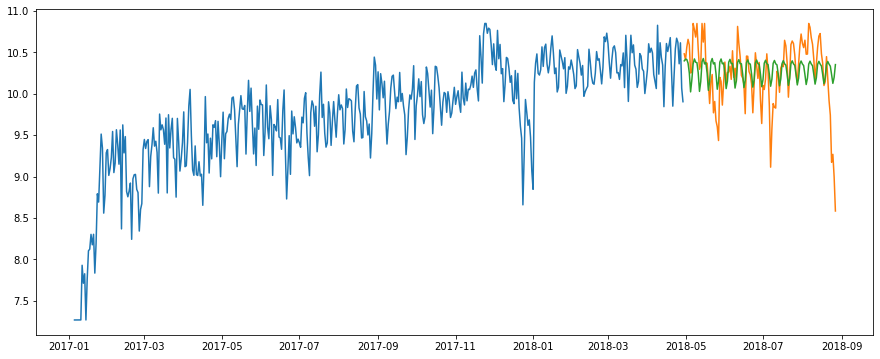

In [75]:
## ARIMA para o modelo com transforma√ß√£o logar√≠tmica

df4_log_model, df4_log_forecast = arima_model(df4_log_train.price, 13 ,1 ,8)

plt.figure(figsize=(15, 6))
plt.plot(df4_log_train.price)
plt.plot(df4_log_test)
plt.plot(df4_log_forecast)

In [76]:
## Analisando resultados

forecast_log = np.exp(df4_log_forecast)
df4_log_test = np.exp(df4_log_test)

summary_model(df4_log_test, forecast_log, df4_log_train_diff['price'], df4_log_model.resid)

Root Mean Square Error:

9180.061052748213


Mean Absolute Error:

7370.351016863287


Result of Fuller test:
Dickey-Fuller test:

Test Statistic                 -6.146155e+00
p-value                         7.758427e-08
#Lags Used                      1.500000e+01
#Number of observations Used    4.630000e+02
Critical Value (1%)            -3.444553e+00
Critical Value (5%)            -2.867803e+00
Critical Value (10%)           -2.570106e+00
dtype: float64


KPSS test:

Teste Statistico KPSS        0.4192
Valor-P                      0.0689
Lags Usados                233.0000
Valores Cr√≠ticos (10%)       0.3470
Valores Cr√≠ticos (5%)        0.4630
Valores Cr√≠ticos (2.5%)      0.5740
Valores Cr√≠ticos (1%)        0.7390
dtype: float64


Ljung-Box test:

      lb_stat  lb_pvalue
30  12.035588    0.99856


Durbin-Watson test:

1.3548775308931338


KS test:

KstestResult(statistic=0.3011093684662918, pvalue=4.244224522925074e-39)


Jarque-bera test:

Jarque_beraResult(statistic=677593.58

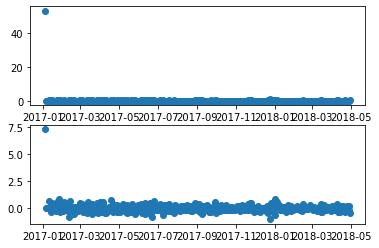

In [77]:
## Verificando heterocedasticidade plotando os erros

plot_error(df4_log_model, df4_log_train.index)

C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

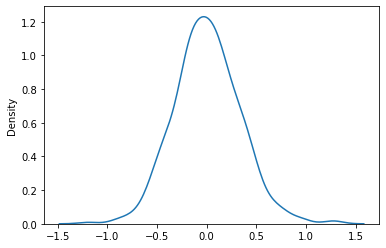

In [119]:
## Avaliar box-cox

import numpy as np 
from scipy.stats import boxcox 
import seaborn as sns 

sns.distplot(df4_log_train_diff, hist=False, kde=True) 

C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='boxcox', ylabel='Density'>

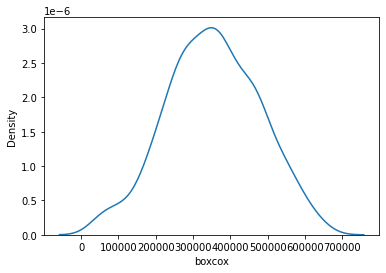

In [79]:
## Transforma√ß√£o box-cox

df4_log_train['boxcox'], best_lambda = boxcox(df4_log_train['price']) 

sns.distplot(df4_log_train['boxcox'], hist=False, kde=True)

In [ ]:
################################################ SARIMA - Modelo Original #####################################################

C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


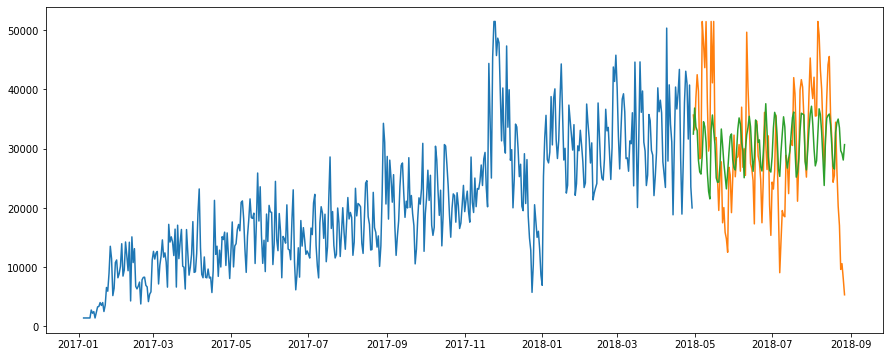

In [82]:
def sarima_model(sarima_column, p, d, q, P, D, Q):
    
    import statsmodels.api as sm
    from statsmodels.tsa.arima.model import ARIMA
    
    result_SAR = sm.tsa.statespace.SARIMAX(sarima_column, freq = 'D', order = (p ,d, q), seasonal_order=(P, D, Q, 30)).fit()
    forecast = result_SAR.forecast(steps=120)
    return result_SAR, forecast

## Sarima para o modelo original

df4_sarima_model, df4_sarima_forecast = sarima_model(df4_train.price, 10,1 ,4, 6, 1, 2)

plt.figure(figsize=(15, 6))
plt.plot(df4_train.price)
plt.plot(df4_test)
plt.plot(df4_sarima_forecast)

## Resultados:

## RMSE: 9819,72 para order = (10 ,1, 4),seasonal_order=(1, 1, 1, 30)
## RMSE: 9984.157432164373 para order = (10 ,1, 4),seasonal_order=(1, 1, 2, 30)
## RMSE: 9991.40202239523 para order = (10 ,1, 4),seasonal_order=(2, 1, 1, 30)
## RMSE: 9878.068506130081 para order = (10 ,1, 4),seasonal_order=(2, 1, 2, 30)
## RMSE: 9569.281540521444 para order = (10 ,1, 4),seasonal_order=(3, 1, 2, 30)
## RMSE: 9321.300672167628 para order = (10 ,1, 4),seasonal_order=(4, 1, 2, 30)
## RMSE: 9317.747451897061 para order = (10 ,1, 4),seasonal_order=(5, 1, 2, 30)
## RMSE: 9361.899167234831 para order = (10 ,1, 4),seasonal_order=(5, 1, 3, 30)
## RMSE: 9103.835504076142 para order = (10 ,1, 4),seasonal_order=(6, 1, 2, 30) 
## RMSE: 9277.125964937486 para order = (10 ,1, 4), seasonal_order=(7, 1, 2, 30)
## RMSE: 9305.669234206498 para order = (10 ,1, 4), seasonal_order=(6, 1, 3, 30)
## RMSE: 9368.528186274874 para order = (10 ,1, 4),seasonal_order=(6, 1, 4, 30)
## RMSE: 9241.073158681867 para order = (10 ,1, 4),seasonal_order=(7, 1, 3, 30)
## RMSE: 9290.071823415343 para order = (10 ,1, 4),seasonal_order=(8, 1, 3, 30)

In [83]:
## Summary do modelo

summary_model(df4_test, df4_sarima_forecast, df4_diff['price'], df4_sarima_model.resid)

Root Mean Square Error:

9103.835504076142


Mean Absolute Error:

7106.68563770809


Result of Fuller test:
Dickey-Fuller test:

Test Statistic                 -6.615837e+00
p-value                         6.210773e-09
#Lags Used                      1.500000e+01
#Number of observations Used    4.630000e+02
Critical Value (1%)            -3.444553e+00
Critical Value (5%)            -2.867803e+00
Critical Value (10%)           -2.570106e+00
dtype: float64


KPSS test:

Teste Statistico KPSS       0.1895
Valor-P                     0.1000
Lags Usados                78.0000
Valores Cr√≠ticos (10%)      0.3470
Valores Cr√≠ticos (5%)       0.4630
Valores Cr√≠ticos (2.5%)     0.5740
Valores Cr√≠ticos (1%)       0.7390
dtype: float64


Ljung-Box test:

      lb_stat  lb_pvalue
30  48.253038   0.018703


Durbin-Watson test:

1.9607185448919808


KS test:



C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


KstestResult(statistic=0.525, pvalue=8.976947935169697e-124)


Jarque-bera test:

Jarque_beraResult(statistic=58.66638273864016, pvalue=1.822986206434507e-13)


ARCH test:

(67.9511217242518, 9.081539859537333e-05, 2.550876301917829, 2.1673844482050573e-05, <statsmodels.stats.diagnostic.ResultsStore object at 0x00000002A88F7910>)




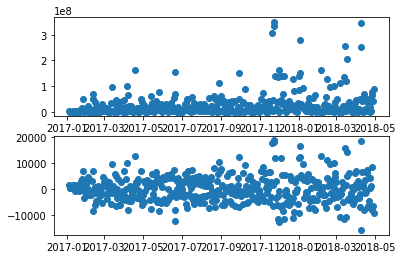

In [84]:
## Analisando resultados

plot_error(df4_sarima_model, df4_train.index)

In [ ]:
############################################## SARIMA - Transforma√ß√£o Logar√≠tmica #############################################

C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


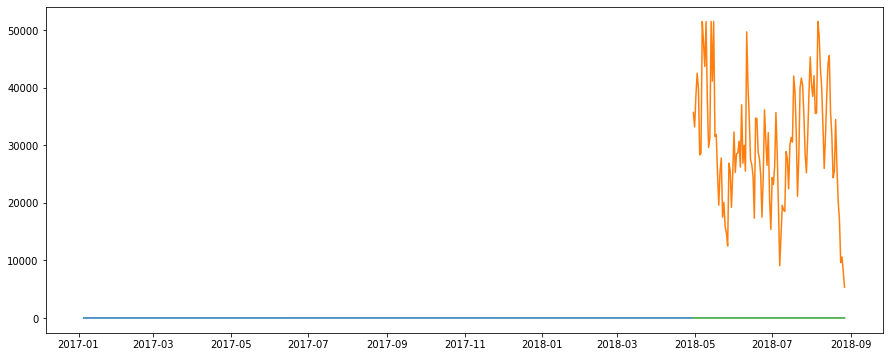

In [86]:
## Sarima para o modelo com transform√ß√£o logar√≠tmica

df4_log_sarima_model, df4_log_sarima_forecast = sarima_model(df4_log_train.price, 10 ,1 ,4, 6, 1, 2)

df4_log_test = np.log(df4_test)

plt.figure(figsize=(15, 6))
plt.plot(df4_log_train.price)
plt.plot(df4_log_test)
plt.plot(df4_log_sarima_forecast)

## Resultados:

## RMSE: 9764.957263578564 order = (10 ,1, 4),seasonal_order=(6, 1, 2, 30)
## RMSE: 11509.113274808042 order = (13 ,1, 8),seasonal_order=(6, 1, 2, 30)
## RMSE: 18838.95621248338  order = (13 ,1, 8),seasonal_order=(6, 1, 3, 30)
## RMSE: 15353.766193912934 order = (10 ,1, 4),seasonal_order=(6, 1, 3, 30)
## RMSE: 9950.505437483987 order = (10 ,1, 4),seasonal_order=(7, 1, 2, 30)
## RMSE: 15281.772681373654 order = (10 ,1, 4),seasonal_order=(5, 1, 2, 30)
## RMSE: 9770.653750812133 order = (10 ,1, 4),seasonal_order=(8, 1, 2, 30))
## RMSE: 10020.933488790599 order = (10 ,1, 4),seasonal_order=(9, 1, 2, 30)
## RMSE: 11173.787394506411 order = (1 ,1, 1),seasonal_order=(6, 1, 2, 30)

In [94]:
## Analisando resultados

forecast_log_sarima = np.exp(df4_log_sarima_forecast)
df4_log_test = np.exp(df4_log_test)

summary_model(df4_log_test, forecast_log_sarima, df4_log_train_diff['price'], df4_log_sarima_model.resid)

Root Mean Square Error:

9764.957263578564


Mean Absolute Error:

7666.960497398232


Result of Fuller test:
Dickey-Fuller test:

Test Statistic                 -6.146155e+00
p-value                         7.758427e-08
#Lags Used                      1.500000e+01
#Number of observations Used    4.630000e+02
Critical Value (1%)            -3.444553e+00
Critical Value (5%)            -2.867803e+00
Critical Value (10%)           -2.570106e+00
dtype: float64


KPSS test:

Teste Statistico KPSS        0.4192
Valor-P                      0.0689
Lags Usados                233.0000
Valores Cr√≠ticos (10%)       0.3470
Valores Cr√≠ticos (5%)        0.4630
Valores Cr√≠ticos (2.5%)      0.5740
Valores Cr√≠ticos (1%)        0.7390
dtype: float64


Ljung-Box test:

      lb_stat  lb_pvalue
30  47.985608   0.019891


Durbin-Watson test:

1.4572591726990294


KS test:

KstestResult(statistic=0.2859022549433855, pvalue=3.2042053808655585e-35)


Jarque-bera test:

Jarque_beraResult(statistic=289073.0

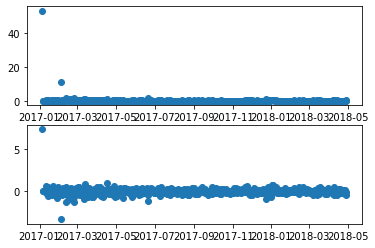

In [95]:
## Verificando heterocedasticidade plotando os erros

plot_error(df4_log_sarima_model, df4_log_train.index)

In [96]:
################################################## SARIMA - Notas 4 e 5 ######################################################

C:\Users\valeria\AppData\Local\Temp\ipykernel_6180\2545891044.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['order_purchase_timestamp'] = pd.to_datetime(df7['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
C:\Users\valeria\AppData\Local\Temp\ipykernel_6180\2545891044.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['order_purchase_timestamp'] = df7['order_purchase_timestamp'].dt.date


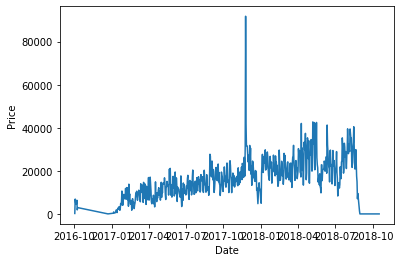

In [97]:
## Criando o dataset

df6 = {}
df6 = pd.DataFrame().assign(order_purchase_timestamp=df['order_purchase_timestamp'], price=df['price'], review_score=df['review_score'])
df6.head()

df7 = df6[df6['review_score']>3]

## Transformando de datetime para date

df7['order_purchase_timestamp'] = pd.to_datetime(df7['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
df7['order_purchase_timestamp'].dtype

df7['order_purchase_timestamp'] = df7['order_purchase_timestamp'].dt.date

## Agregando o pre√ßo por data

df7 = df7.groupby("order_purchase_timestamp").price.sum()
df7 = df7.to_frame()

## Plot da rela√ß√£o entre data e pre√ßo. Poodemos observar um outlier

plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df7)

C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

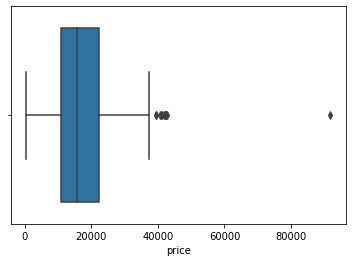

In [98]:
## Preenchendo as datas faltantes com vendas nulas

df7 = df7.asfreq(freq='1D', fill_value = 0)
df7

## Dropando valores nulos do in√≠cio da s√©rie
df7 = df7.loc['2017-01-05':'2018-08-27']

import seaborn as sns
sns.boxplot(df7['price'])


C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

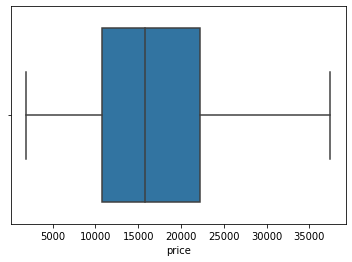

In [99]:
## Aqui, ser√° utilizado percentil de 0.98 para remover todos os outliers

upper_limit = df7['price'].quantile(0.98)
lower_limit = df7['price'].quantile(0.02)

df7['price'] = np.where((df7['price'] < lower_limit),
        lower_limit,
        np.where((df7['price'] > upper_limit),
        upper_limit,
        df7['price']))

sns.boxplot(df7['price'])

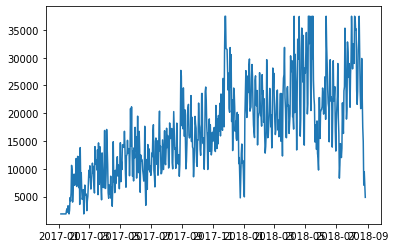

In [100]:
## Plotando a s√©rie tratada

df7 = df7.asfreq(freq='1D', fill_value = 0)

df7.interpolate(inplace=True)

plt.plot(df7)

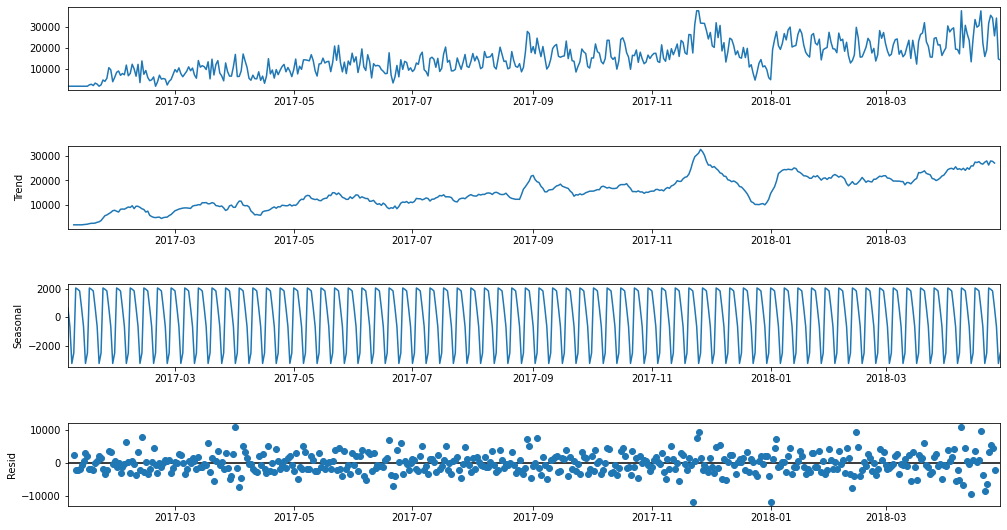

In [101]:
## Dividindo dataset entre treino e teste


import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## Dividindo o dataset entre treino e teste
x = df7
df7_train, df7_test = train_test_split(x, train_size=480)

## Plotando tend√™ncia, sazonalidade e res√≠duos

from statsmodels.tsa.seasonal import seasonal_decompose

season = seasonal_decompose(df7_train)
fig = season.plot();
fig.set_size_inches(16,8)

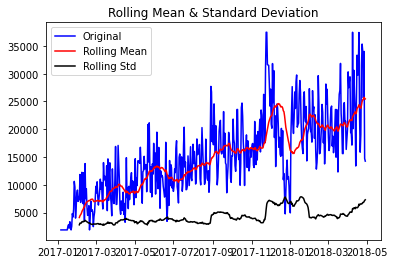

In [102]:
## Defasando para criar a m√©dia m√≥vel e o desvio padr√£o em 30 dias

rolmean = df7_train.rolling(window= 30).mean()
rolstd = df7_train.rolling(window = 30).std()

## Plotando a m√©dia m√≥vel

orig = plt.plot(df7_train, color='blue', label = 'Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [103]:
## Teste de Dickey-Fuller

dickey_fuller(df7_train['price'])

Result of Fuller test:
Dickey-Fuller test:

Test Statistic                   -2.404564
p-value                           0.140452
#Lags Used                       15.000000
#Number of observations Used    464.000000
Critical Value (1%)              -3.444522
Critical Value (5%)              -2.867789
Critical Value (10%)             -2.570099
dtype: float64


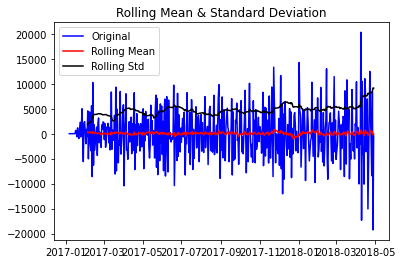

In [104]:
##Diferenciando a s√©rie

df7_diff = df7_train.diff()

df7_rolmeandDiff = df7_diff.rolling(window= 30).mean()
df7_rolstdDiff = df7_diff.rolling(window = 30).std()


## Plotando a diferencia√ß√£o

orig = plt.plot(df7_diff, color='blue', label = 'Original')
mean = plt.plot(df7_rolmeandDiff, color='red', label = 'Rolling Mean')
std = plt.plot(df7_rolstdDiff, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


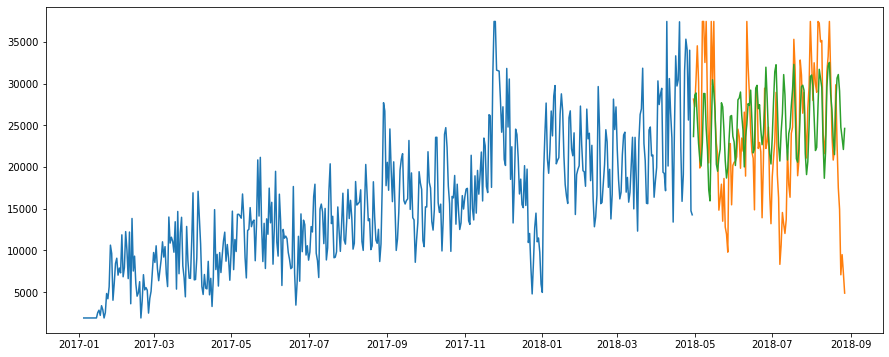

In [106]:
## Sarima para o modelo original

df7_sarima_model, df7_sarima_forecast = sarima_model(df7_train.price, 10 ,1 ,4, 6, 1, 2)

plt.figure(figsize=(15, 6))
plt.plot(df7_train.price)
plt.plot(df7_test)
plt.plot(df7_sarima_forecast)

In [107]:
## Summary do modelo

summary_model(df7_test, df7_sarima_forecast, df7_diff['price'], df7_sarima_model.resid)

Root Mean Square Error:

7268.142949863834


Mean Absolute Error:

5775.78932783638


Result of Fuller test:
Dickey-Fuller test:

Test Statistic                 -6.340439e+00
p-value                         2.763242e-08
#Lags Used                      1.400000e+01
#Number of observations Used    4.640000e+02
Critical Value (1%)            -3.444522e+00
Critical Value (5%)            -2.867789e+00
Critical Value (10%)           -2.570099e+00
dtype: float64


KPSS test:

Teste Statistico KPSS        0.2928
Valor-P                      0.1000
Lags Usados                149.0000
Valores Cr√≠ticos (10%)       0.3470
Valores Cr√≠ticos (5%)        0.4630
Valores Cr√≠ticos (2.5%)      0.5740
Valores Cr√≠ticos (1%)        0.7390
dtype: float64


Ljung-Box test:

      lb_stat  lb_pvalue
30  45.443271   0.035086


Durbin-Watson test:

1.9936266860326883


KS test:

KstestResult(statistic=0.512499999973858, pvalue=1.5683853560264572e-117)


Jarque-bera test:

Jarque_beraResult(statistic=31.592115

C:\Users\valeria\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


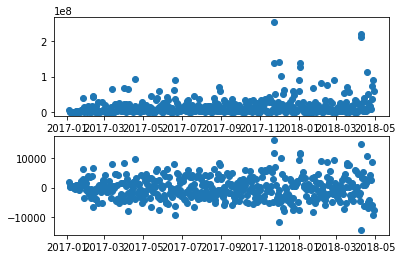

In [108]:
## Analisando resultados

plot_error(df7_sarima_model, df7_train.index)

In [ ]:
############################### Comparando resultados para notas boas/ruins e notas boas ######################################

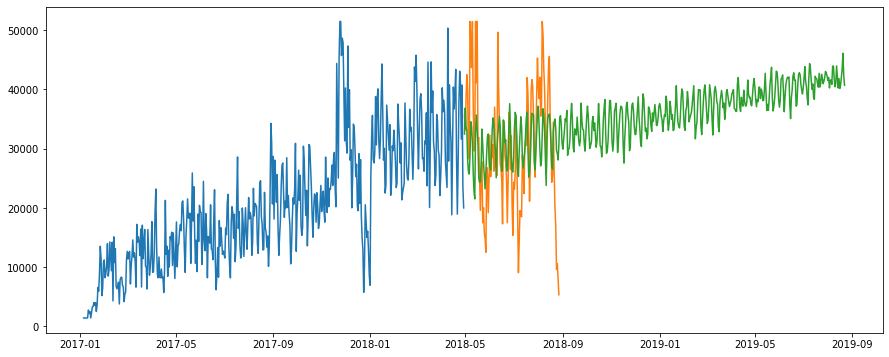

In [114]:
## Forecast para notas boas e ruins

forecast_all = df4_sarima_model.forecast(steps=480)

forecast_all = forecast_all.loc['2018-04-30':'2019-08-22']

plt.figure(figsize=(15, 6))
plt.plot(df4_train.price)
plt.plot(df4_test)
plt.plot(forecast_all)

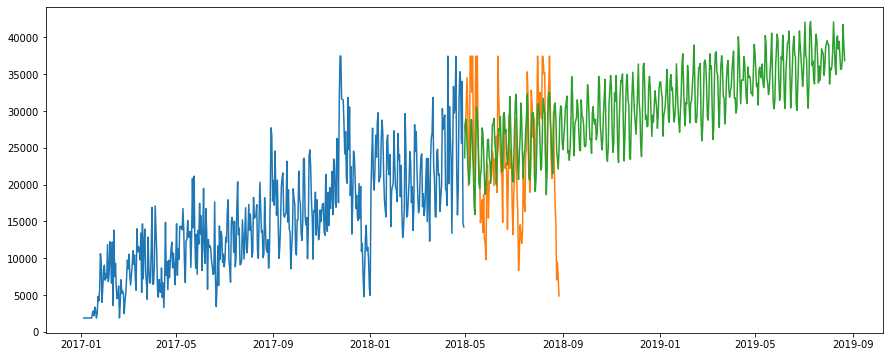

In [115]:
##Forecast para notas boas

forecast_best_scores = df7_sarima_model.forecast(steps=480)

forecast_best_scores = forecast_best_scores.loc['2018-04-30':'2019-08-22']

plt.figure(figsize=(15, 6))
plt.plot(df7_train.price)
plt.plot(df7_test)
plt.plot(forecast_best_scores)

In [111]:
## Soma da receita para notas boas e ruins

forecast_all.sum()

13381690.04969742

In [112]:
## Soma da receita para notas boas

forecast_best_scores.sum()

11805674.776975483